In [2]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("train.csv")
df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [6]:
df_monday = df[df['Publication_Day'] == 'Monday']
df_monday

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
8,8,Daily Digest,Episode 32,105.87,News,69.81,Monday,Evening,NaN,2.0,Neutral,68.00124
11,11,Melody Mix,Episode 62,107.26,Music,78.12,Monday,Evening,78.12,1.0,Positive,103.56000
24,24,Sports Central,Episode 36,79.50,Sports,59.96,Monday,Evening,15.72,0.0,Neutral,54.52628
...,...,...,...,...,...,...,...,...,...,...,...,...
749932,749932,Brain Boost,Episode 76,101.86,Education,49.58,Monday,Afternoon,7.20,3.0,Negative,44.95829
749940,749940,Fitness First,Episode 43,71.52,Health,70.92,Monday,Morning,NaN,0.0,Neutral,63.37868
749945,749945,Tech Talks,Episode 87,111.14,Technology,74.88,Monday,Night,88.88,3.0,Neutral,62.27626
749947,749947,Joke Junction,Episode 21,99.61,Comedy,38.49,Monday,Night,81.83,0.0,Negative,77.12524


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter

In [9]:
observations = df_monday['Listening_Time_minutes'].values
n = len(observations)

# Khởi tạo Kalman Filter
kf = KalmanFilter(dim_x=1, dim_z=1)

# Cài đặt các tham số
kf.F = np.array([[1]])   # Ma trận chuyển trạng thái
kf.H = np.array([[1]])   # Ma trận quan sát
kf.R = 10               # Nhiễu đo lường
kf.Q = 0.01             # Nhiễu hệ thống
kf.x = np.array([[observations[0]]])  # Trạng thái ban đầu
kf.P = np.array([[1]])  # Phương sai trạng thái ban đầu

# Kalman Filter (Forward Pass)
filtered_states = np.zeros(n)
for t in range(n):
    kf.predict()
    kf.update(observations[t])
    filtered_states[t] = kf.x[0]

C:\Users\Admin\AppData\Local\Temp\ipykernel_3048\2208315055.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  filtered_states[t] = kf.x[0]


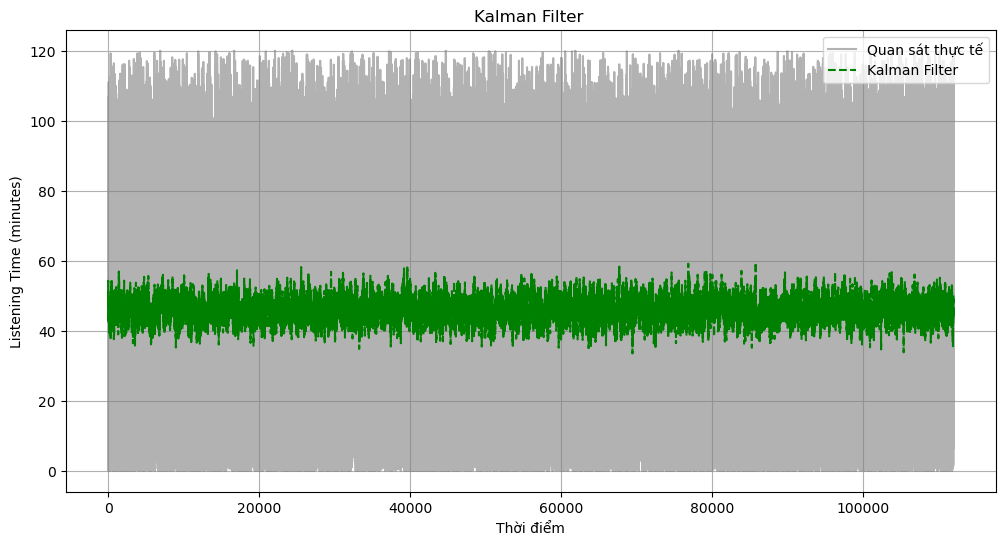

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(observations, label='Quan sát thực tế', color='gray', alpha=0.6)
plt.plot(filtered_states, label='Kalman Filter', linestyle='--', color='green')
plt.title('Kalman Filter ')
plt.xlabel('Thời điểm')
plt.ylabel('Listening Time (minutes)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
smoothed_states = np.copy(filtered_states)
for t in range(n - 2, -1, -1):
    # RTS gain (filter gain)
    P_filt = kf.P
    P_pred_next = kf.P  # P_next sẽ là kết quả dự đoán từ bước tiếp theo
    A = P_filt / (P_filt + kf.Q)

    # Cập nhật giá trị mượt
    smoothed_states[t] = filtered_states[t] + A * (smoothed_states[t + 1] - filtered_states[t])


C:\Users\Admin\AppData\Local\Temp\ipykernel_3048\1243943426.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  smoothed_states[t] = filtered_states[t] + A * (smoothed_states[t + 1] - filtered_states[t])


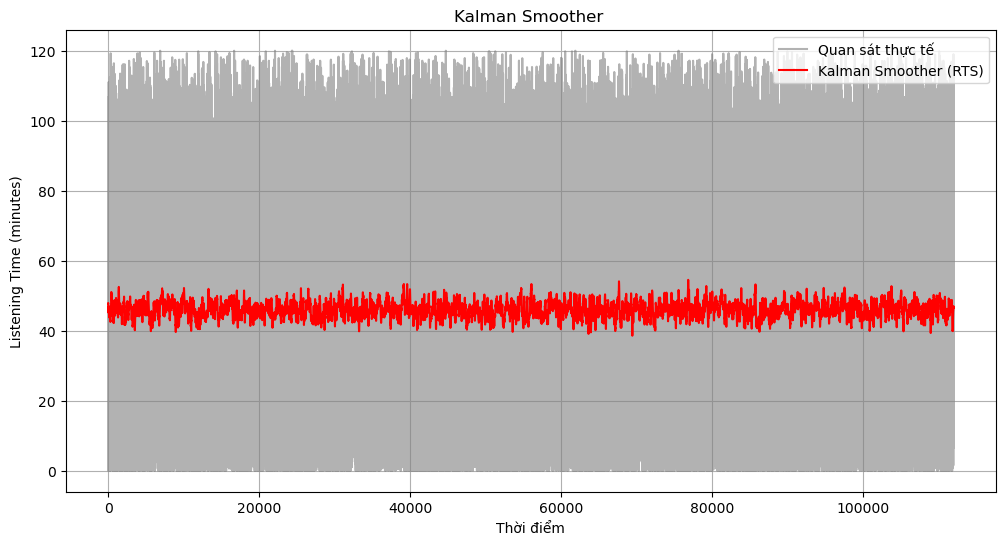

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(observations, label='Quan sát thực tế', color='gray', alpha=0.6)
plt.plot(smoothed_states, label='Kalman Smoother (RTS)', color='red')
plt.title('Kalman Smoother ')
plt.xlabel('Thời điểm')
plt.ylabel('Listening Time (minutes)')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
filtered_states = np.zeros((n, 2))
for t in range(n):
    kf.predict()  # Dự đoán
    kf.update(observations[t])  # Cập nhật với quan sát mới
    filtered_states[t] = kf.x.T  # Lưu trữ trạng thái

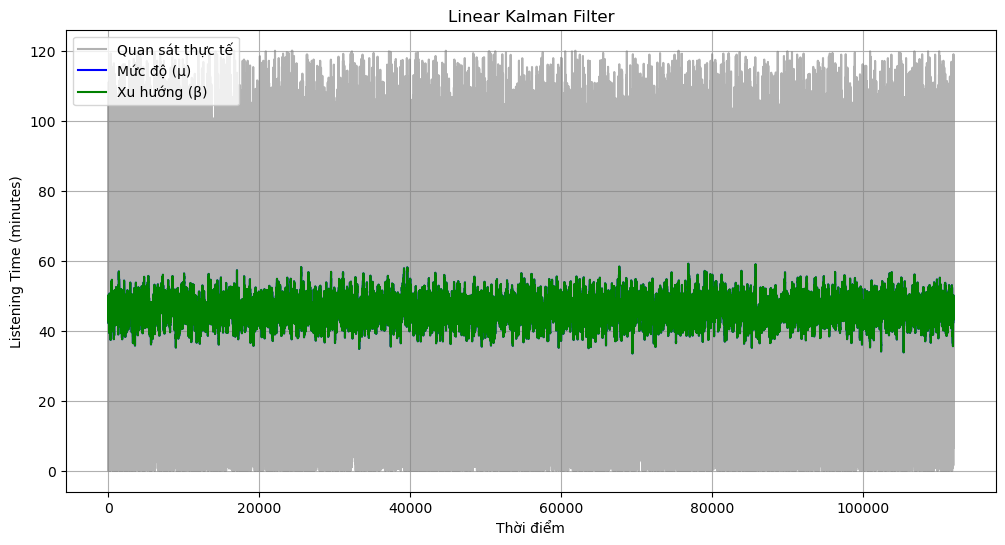

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(observations, label='Quan sát thực tế', color='gray', alpha=0.6)
plt.plot(filtered_states[:, 0], label='Mức độ (μ)', color='blue')
plt.plot(filtered_states[:, 1], label='Xu hướng (β)', color='green')
plt.title('Linear Kalman Filter')
plt.xlabel('Thời điểm')
plt.ylabel('Listening Time (minutes)')
plt.legend()
plt.grid(True)
plt.show()